In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

os.listdir("/content/drive/MyDrive/dataset/train")

['1', '0']

In [ ]:
os.listdir("/content/drive/MyDrive/dataset/v")

['1', '0']

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SHAPE  = 224
batch_size = 32

In [ ]:
from tensorflow import keras

base_model = keras.applications.ResNet50(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])


from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/dataset/train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/dataset/v', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

h1= model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

Found 44 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/20
12/12 [==============================] - 26s 803ms/step - loss: 0.7550 - binary_accuracy: 0.5568 - val_loss: 0.6888 - val_binary_accuracy: 0.7500
Epoch 2/20
12/12 [==============================] - 4s 328ms/step - loss: 0.5352 - binary_accuracy: 0.7386 - val_loss: 0.6152 - val_binary_accuracy: 0.6875
Epoch 3/20
12/12 [==============================] - 4s 318ms/step - loss: 0.3682 - binary_accuracy: 0.8523 - val_loss: 0.4273 - val_binary_accuracy: 0.8750
Epoch 4/20
12/12 [==============================] - 4s 325ms/step - loss: 0.3419 - binary_accuracy: 0.8864 - val_loss: 0.5520 - val_binary_accuracy: 0.7188
Epoch 5/20
12/12 [==============================] - 4s 327ms/step - loss: 0.3347 - binary_accuracy: 0.8636 - val_loss: 0.4184 - val_binary_accuracy: 0.8125
Epoch 6/20
12/12 [==============================] - 4s 331ms/step - loss: 0.2355 - binary_accuracy: 0.8750 - val_loss: 0.8082 - val_binary_

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .000001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=50)

Epoch 1/50
12/12 [==============================] - 18s 538ms/step - loss: 0.0722 - binary_accuracy: 0.9886 - val_loss: 0.4233 - val_binary_accuracy: 0.8125
Epoch 2/50
12/12 [==============================] - 5s 390ms/step - loss: 0.0569 - binary_accuracy: 0.9773 - val_loss: 0.8114 - val_binary_accuracy: 0.7188
Epoch 3/50
12/12 [==============================] - 5s 421ms/step - loss: 0.0424 - binary_accuracy: 0.9886 - val_loss: 0.8747 - val_binary_accuracy: 0.6875
Epoch 4/50
12/12 [==============================] - 5s 390ms/step - loss: 0.0464 - binary_accuracy: 1.0000 - val_loss: 0.6115 - val_binary_accuracy: 0.7188
Epoch 5/50
12/12 [==============================] - 5s 396ms/step - loss: 0.0383 - binary_accuracy: 1.0000 - val_loss: 0.6619 - val_binary_accuracy: 0.7500
Epoch 6/50
12/12 [==============================] - 5s 409ms/step - loss: 0.0366 - binary_accuracy: 0.9886 - val_loss: 0.8358 - val_binary_accuracy: 0.7188
Epoch 7/50
12/12 [==============================] - 5s 424ms/st

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


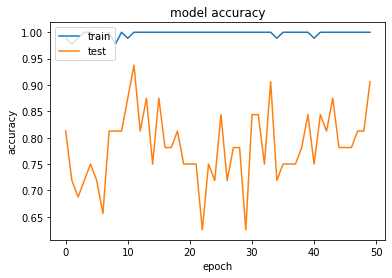

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

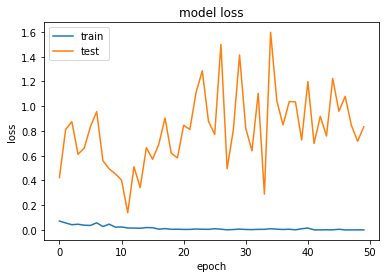

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()